___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {'axes.grid' : False})
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (10,6)

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv("treetypes10k.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,3183,72,12,85,9,2640,234,215,111,1647,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2799,24,16,120,17,1084,210,205,128,3129,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3220,120,14,150,-15,2466,243,228,111,3887,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3014,79,17,120,3,3292,240,207,91,808,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,3169,73,9,424,53,1988,230,223,126,3037,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,3249,84,14,366,80,1383,239,215,103,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7
9746,3359,20,13,480,120,3180,211,212,135,2328,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
9747,3334,5,5,601,39,836,214,229,153,1538,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
9748,3321,330,13,549,66,3455,188,223,174,3476,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9750 entries, 0 to 9749
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           9750 non-null   int64
 1   Aspect                              9750 non-null   int64
 2   Slope                               9750 non-null   int64
 3   Horizontal_Distance_To_Hydrology    9750 non-null   int64
 4   Vertical_Distance_To_Hydrology      9750 non-null   int64
 5   Horizontal_Distance_To_Roadways     9750 non-null   int64
 6   Hillshade_9am                       9750 non-null   int64
 7   Hillshade_Noon                      9750 non-null   int64
 8   Hillshade_3pm                       9750 non-null   int64
 9   Horizontal_Distance_To_Fire_Points  9750 non-null   int64
 10  Wilderness_Area_1                   9750 non-null   int64
 11  Wilderness_Area_2                   9750 non-null   int64
 12  Wilder

In [4]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000,9750.000
mean,2775.374,157.473,16.028,233.514,50.686,1789.926,211.959,219.256,136.044,1569.092,0.259,0.035,0.422,0.281,0.017,0.031,0.051,0.044,0.008,0.033,0.000,0.000,0.001,0.118,0.021,0.021,0.032,0.005,0.000,0.006,0.027,0.003,0.003,0.009,0.001,0.028,0.054,0.021,0.000,0.004,0.001,0.001,0.095,0.046,0.024,0.047,0.046,0.002,0.006,0.000,0.002,0.044,0.037,0.028,3.744
std,410.106,110.557,8.208,211.563,61.376,1358.878,30.619,22.090,45.127,1151.255,0.438,0.184,0.494,0.450,0.128,0.175,0.221,0.204,0.090,0.179,0.014,0.010,0.025,0.323,0.142,0.143,0.177,0.070,0.000,0.074,0.162,0.052,0.058,0.095,0.032,0.165,0.226,0.142,0.010,0.066,0.036,0.030,0.293,0.209,0.152,0.213,0.209,0.044,0.074,0.000,0.050,0.204,0.188,0.165,2.047
min,1876.000,0.000,0.000,0.000,-134.000,0.000,0.000,103.000,0.000,26.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,2411.000,65.000,10.000,67.000,5.000,797.000,195.000,207.000,109.000,752.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
50%,2801.000,126.000,15.000,185.500,32.000,1377.000,219.000,223.000,139.000,1302.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
75%,3125.000,264.000,21.000,336.000,79.000,2456.750,235.000,235.000,167.000,2046.750,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000
max,3845.000,359.000,50.000,1273.000,598.000,6959.000,254.000,254.000,252.000,7150.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,7.000


In [5]:
df.nunique()

Elevation                             1594
Aspect                                 360
Slope                                   51
Horizontal_Distance_To_Hydrology       889
Vertical_Distance_To_Hydrology         397
Horizontal_Distance_To_Roadways       3825
Hillshade_9am                          172
Hillshade_Noon                         132
Hillshade_3pm                          246
Horizontal_Distance_To_Fire_Points    3332
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

1    1750
2    1750
3    1250
4    1250
5    1250
6    1250
7    1250
Name: Cover_Type, dtype: int64


<AxesSubplot:ylabel='Cover_Type'>

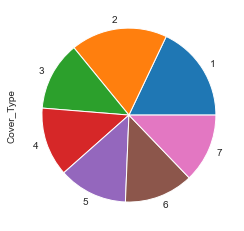

In [6]:
# There are 7 types of trees in the forest district.

print(df.Cover_Type.value_counts())
df.Cover_Type.value_counts().plot.pie()

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [7]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [8]:
numeric = df.select_dtypes('number').nunique()[df.select_dtypes('number').nunique()>7].index
numeric

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

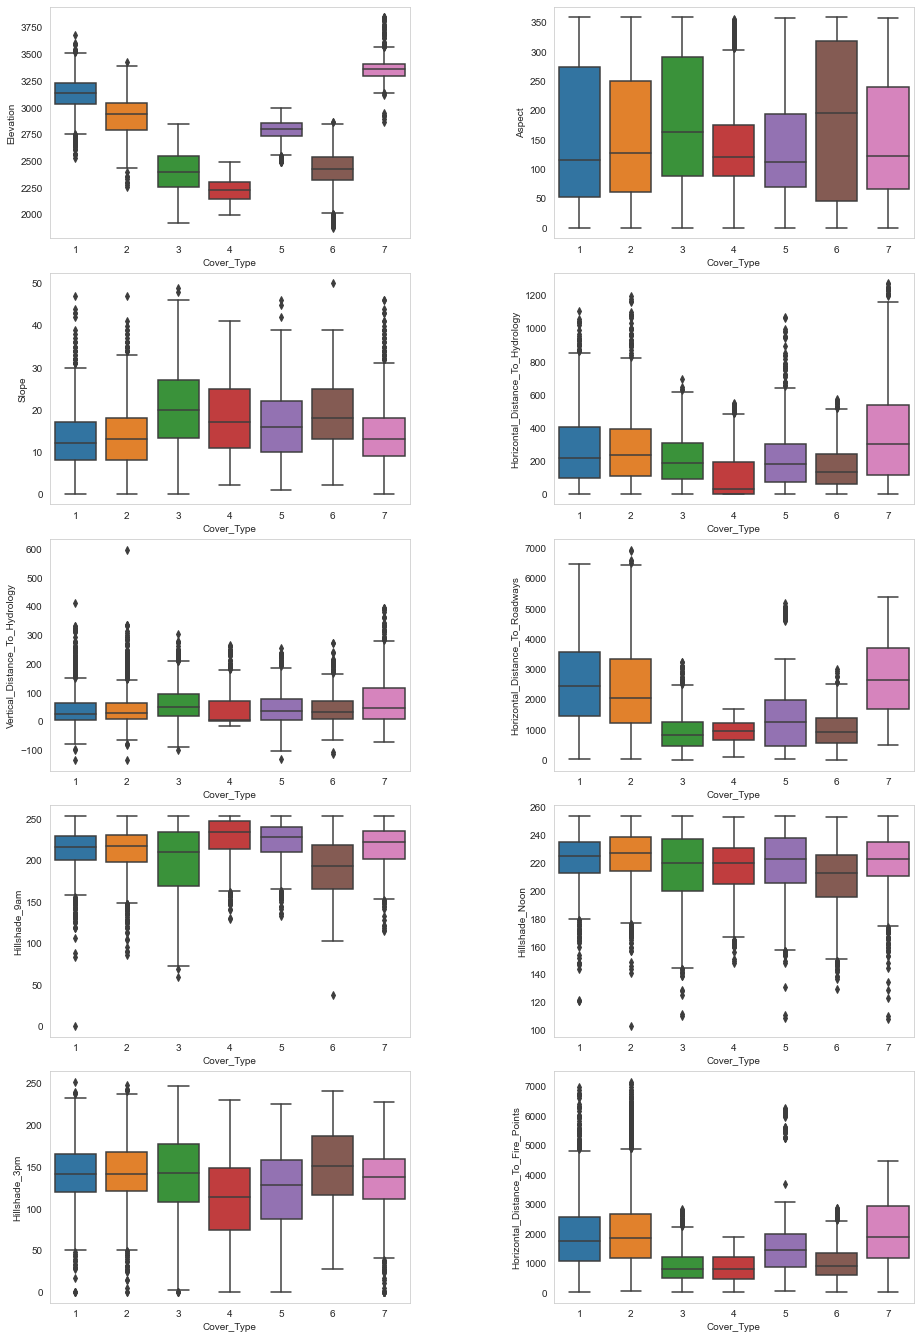

In [9]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(
    left=0.1, right=0.9,
    top=1.9, bottom=0.1,
    wspace=0.4, hspace=0.15
)
for i, col in enumerate(numeric):
    plt.subplot(int(np.ceil(len(numeric)/2)), 2, i+1)
    sns.boxplot(y=col, x= df["Cover_Type"], data=df);

In [10]:
# We can produce a function to get the number of outliers respectively each class. For the sake of practicality, we find the outliers for features without consideration of class distinction

def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    IQR = q3 - q1
                      
    upper_limit = q3 + (tukey*IQR)
    lower_limit = q1 - (tukey*IQR)
    outlier_count = ((df[col_name] < lower_limit) | (df[col_name] > upper_limit)).sum()
 
    return lower_limit, upper_limit, outlier_count

In [11]:
# Drop outliers with 3 IQR
out_cols = []
for col in numeric:
    print(
        f"{col}\nlower:{detect_outliers(df, col,3)[0]} \nupper:{detect_outliers(df, col,3)[1]}\
        \noutlier:{detect_outliers(df, col,3)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,3)[2] > 0 :
        out_cols.append(col)
print(out_cols)  

Elevation
lower:269.0 
upper:5267.0        
outlier:0
*-*-*-*-*-*-*
Aspect
lower:-532.0 
upper:861.0        
outlier:0
*-*-*-*-*-*-*
Slope
lower:-23.0 
upper:54.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Hydrology
lower:-740.0 
upper:1143.0        
outlier:23
*-*-*-*-*-*-*
Vertical_Distance_To_Hydrology
lower:-217.0 
upper:301.0        
outlier:42
*-*-*-*-*-*-*
Horizontal_Distance_To_Roadways
lower:-4182.25 
upper:7436.0        
outlier:0
*-*-*-*-*-*-*
Hillshade_9am
lower:75.0 
upper:355.0        
outlier:5
*-*-*-*-*-*-*
Hillshade_Noon
lower:123.0 
upper:319.0        
outlier:10
*-*-*-*-*-*-*
Hillshade_3pm
lower:-65.0 
upper:341.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Fire_Points
lower:-3132.25 
upper:5931.0        
outlier:96
*-*-*-*-*-*-*
['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']


### Deal with Outliers

#### *ii. Drop Outliers*

In [12]:
out_cols

['Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points']

In [13]:
df_copy = df.copy()

In [14]:
# 3*IQR 'a göre belirlenen kolonlardan outlier değerleri 1.5*IQR'a göre düşüyor.
# We have decided to drop outliers over 1,5 iqr

for col in out_cols:
    df = df[(df_copy[col] > detect_outliers(df, col)[0])
             & (df[col] < detect_outliers(df, col)[1])]

In [15]:
df.shape

(8254, 55)

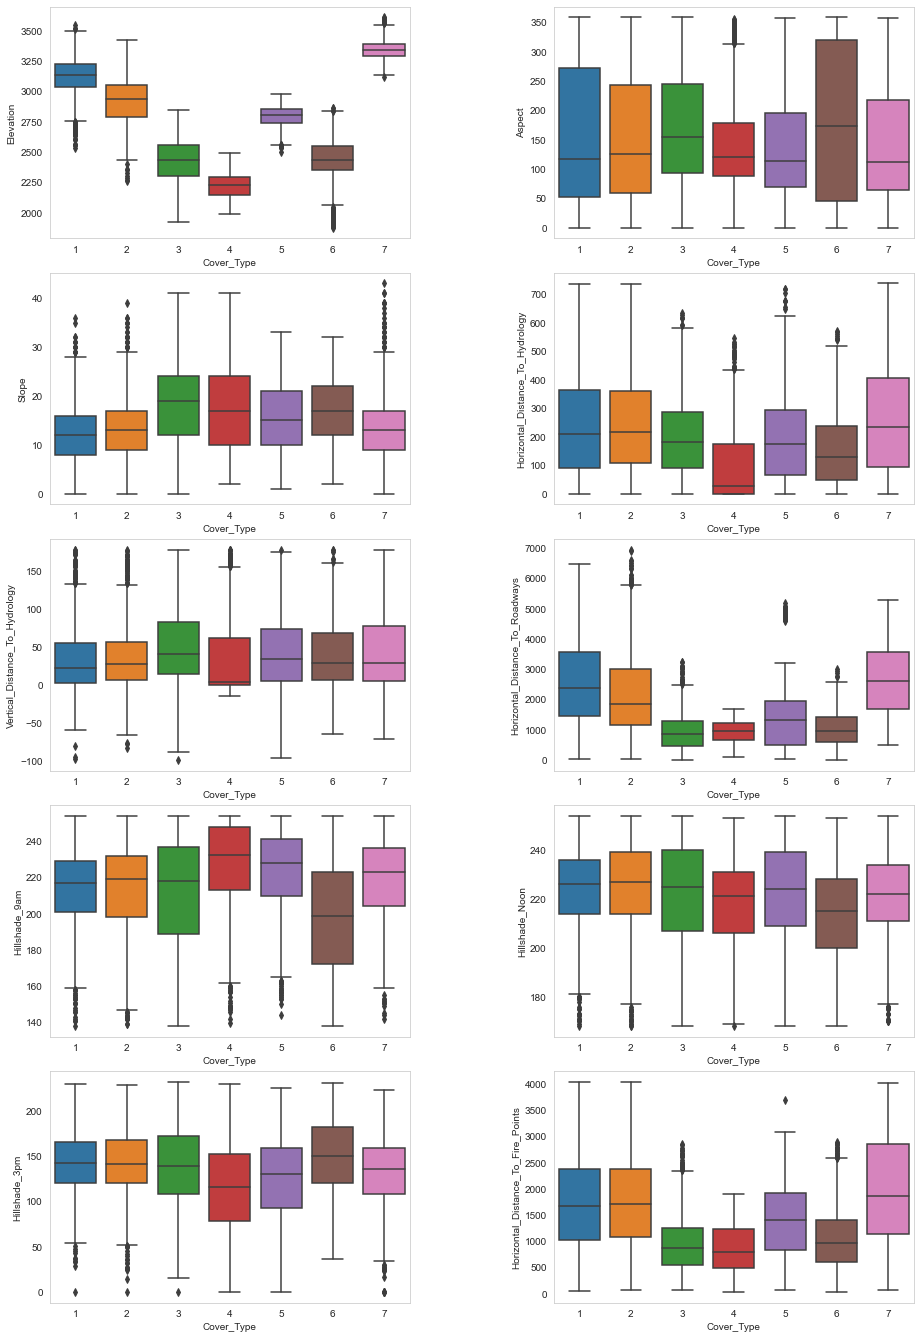

In [16]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(
    left=0.1, right=0.9,
    top=1.9, bottom=0.1,
    wspace=0.4, hspace=0.15
)
for i, col in enumerate(numeric):
    plt.subplot(int(np.ceil(len(numeric)/2)), 2, i+1)
    sns.boxplot(y=col, x= df["Cover_Type"], data=df);

In [17]:
len(df_copy) -len(df)

1496

In [18]:
df = df.reset_index(drop=True)

In [19]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,3183,72,12,85,9,2640,234,215,111,1647,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2799,24,16,120,17,1084,210,205,128,3129,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3220,120,14,150,-15,2466,243,228,111,3887,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3014,79,17,120,3,3292,240,207,91,808,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,3169,73,9,424,53,1988,230,223,126,3037,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,3249,84,14,366,80,1383,239,215,103,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7
8250,3359,20,13,480,120,3180,211,212,135,2328,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
8251,3334,5,5,601,39,836,214,229,153,1538,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
8252,3321,330,13,549,66,3455,188,223,174,3476,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7


In [20]:
# Targer feature

df.Cover_Type.value_counts().sort_index()

1    1496
2    1411
3    1008
4    1190
5    1110
6    1076
7     963
Name: Cover_Type, dtype: int64

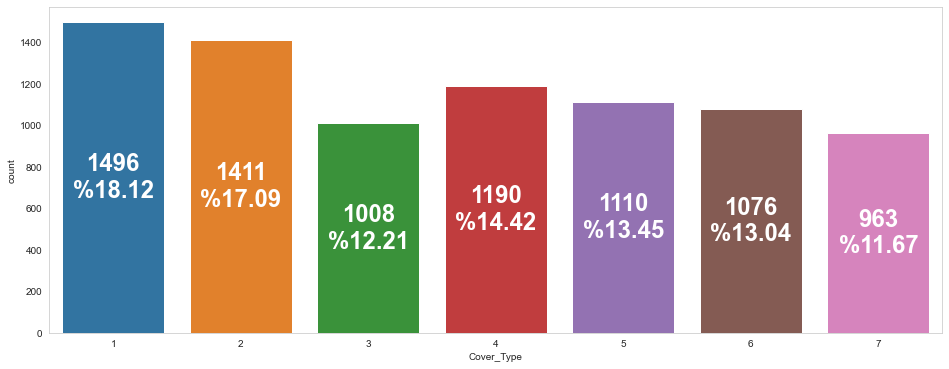

In [21]:
fig, ax = plt.subplots(figsize=(16,6))
# to show the proportion of each class
g = sns.countplot(df["Cover_Type"])
for c in g.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h}\n%{100*(h/df["Cover_Type"].count()):0.2f}' if (h:=v.get_height()) > 0 else '' for v in c]
    g.bar_label(c, labels=labels, fontsize=24, color='w', weight='bold', label_type='center', rotation=0)

### Now, let's take a closer look at correlation of continuous columns.

In [22]:
df[numeric].corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000,-0.035,-0.273,0.366,0.044,0.567,0.064,0.168,0.078,0.490
Aspect,-0.035,1.000,0.041,0.001,0.015,0.046,-0.622,0.341,0.627,-0.080
Slope,-0.273,0.041,1.000,-0.033,0.301,-0.227,-0.062,-0.506,-0.352,-0.176
Horizontal_Distance_To_Hydrology,0.366,0.001,-0.033,1.000,0.576,0.122,-0.013,0.047,0.042,0.172
Vertical_Distance_To_Hydrology,0.044,0.015,0.301,0.576,1.000,-0.060,-0.028,-0.137,-0.089,0.005
Horizontal_Distance_To_Roadways,0.567,0.046,-0.227,0.122,-0.060,1.000,-0.036,0.193,0.156,0.413
Hillshade_9am,0.064,-0.622,-0.062,-0.013,-0.028,-0.036,1.000,-0.137,-0.831,0.082
Hillshade_Noon,0.168,0.341,-0.506,0.047,-0.137,0.193,-0.137,1.000,0.637,0.057
Hillshade_3pm,0.078,0.627,-0.352,0.042,-0.089,0.156,-0.831,0.637,1.000,-0.002
Horizontal_Distance_To_Fire_Points,0.490,-0.080,-0.176,0.172,0.005,0.413,0.082,0.057,-0.002,1.000


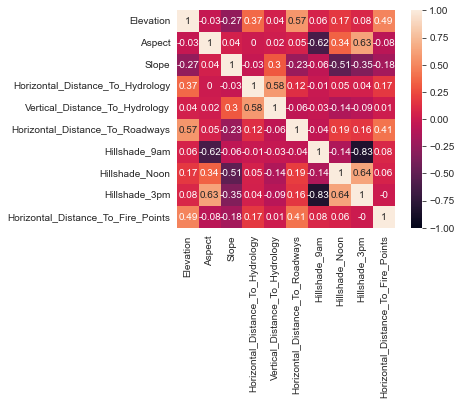

In [23]:
sns.heatmap(df[numeric].corr().round(2), vmin=-1, vmax=1, annot=True, square=True);

In [24]:
df.to_csv("covtype_EDA.csv", index = False)

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [25]:
df["Square_Hypo_Distance"] = (df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)
df["Average_Dist_Road_Hydro"] = (df['Horizontal_Distance_To_Hydrology']+df['Horizontal_Distance_To_Roadways'])/2 
df["Average_Elevation_Hydro"] = (df['Elevation']+df['Vertical_Distance_To_Hydrology'])/2

In [26]:
df.drop(columns=["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Elevation"], inplace=True)

In [27]:
df.shape

(8254, 54)

In [28]:
numeric = df.select_dtypes('number').nunique()[df.select_dtypes('number').nunique()>7].index
numeric

Index(['Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Square_Hypo_Distance',
       'Average_Dist_Road_Hydro', 'Average_Elevation_Hydro'],
      dtype='object')

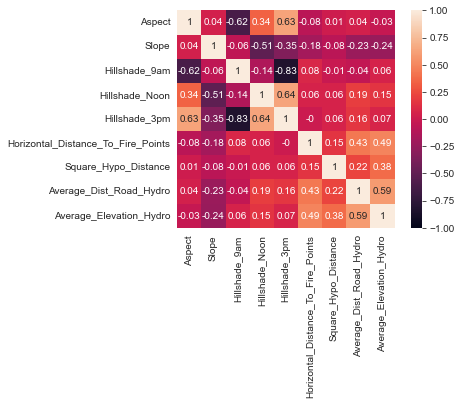

In [29]:
sns.heatmap(df[numeric].corr().round(2), vmin=-1, vmax=1, annot=True, square=True);

In [30]:
df.to_csv("covtype2.csv", index = False)

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [31]:
!pip install xgboost

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassificationReport

In [33]:
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score
import pickle

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [34]:
df = pd.read_csv("covtype2.csv")
df

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,72,12,234,215,111,1647,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,7306,1362.500,1596.000
1,24,16,210,205,128,3129,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14689,602.000,1408.000
2,120,14,243,228,111,3887,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22725,1308.000,1602.500
3,79,17,240,207,91,808,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,14409,1706.000,1508.500
4,73,9,230,223,126,3037,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,182585,1206.000,1611.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,84,14,239,215,103,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,140356,874.500,1664.500
8250,20,13,211,212,135,2328,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,244800,1830.000,1739.500
8251,5,5,214,229,153,1538,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,362722,718.500,1686.500
8252,330,13,188,223,174,3476,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,305757,2002.000,1693.500


In [35]:
X = X = df.drop("Cover_Type", axis = 1)

y = df["Cover_Type"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [37]:
scaler = MinMaxScaler() # will be used later in pipeline

In [38]:
modelSVM = LinearSVC(max_iter=2000, random_state=42)

Alternatives
modelSVM = SVC(kernel="linear") # takes approximitely 20 mins to fit
modelSVM = SVC(kernel="linear", max_iter=2000) #lower scores and much more time to fit- about 8 mins
modelSVM = BaggingClassifier(SVC(kernel="linear"),n_jobs=-1, max_samples=.1,n_estimators=10) # we drop the model computional complexity with bagging and that gives us better time and better accuracy

In [39]:
from sklearn.pipeline  import Pipeline

pipe_modelSVM = Pipeline([("scaler",scaler),("SVM",modelSVM)]) # pipeline is used to combine the steps of the model

In [40]:
pipe_modelSVM.fit(X_train , y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVM', LinearSVC(max_iter=2000, random_state=42))])

In [41]:
y_pred_test = pipe_modelSVM.predict(X_test)
y_pred_train = pipe_modelSVM.predict(X_train)

In [42]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.6559660811629315,
 0.6447069513857338,
 0.6548661492560449,
 0.6451964203670275)

TEST REPORT
              precision    recall  f1-score   support

           1       0.63      0.69      0.66       299
           2       0.58      0.50      0.54       282
           3       0.56      0.48      0.51       202
           4       0.78      0.89      0.83       238
           5       0.61      0.61      0.61       222
           6       0.59      0.60      0.60       215
           7       0.83      0.84      0.83       193

    accuracy                           0.66      1651
   macro avg       0.65      0.66      0.65      1651
weighted avg       0.65      0.66      0.65      1651




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.61      0.67      0.64      1197
           2       0.54      0.47      0.50      1129
           3       0.60      0.52      0.56       806
           4       0.79      0.91      0.85       952
           5       0.56      0.56      0.5

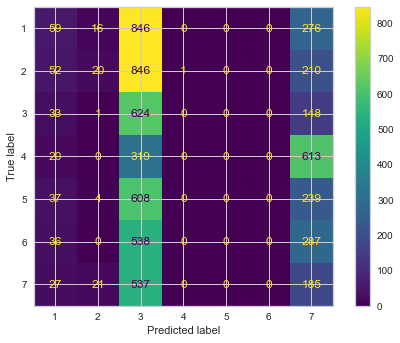

In [43]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(modelSVM, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(modelSVM, X_train, y_train);

In [44]:
# cross validation

operations = [("scaler", StandardScaler()), ("ModelSVM", modelSVM)]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted','f1_weighted'], cv = 10, error_score='raise')
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.635
test_precision_weighted   0.630
test_recall_weighted      0.635
test_f1_weighted          0.630
dtype: float64

In [45]:
# GridSearch

param_grid = {'modelSVM__C': np.linspace(0.01,1, 3)}
param_grid

{'modelSVM__C': array([0.01 , 0.505, 1.   ])}

In [46]:

model = Pipeline([("scaler",scaler),("modelSVM", modelSVM)]) 

svm_model_grid = GridSearchCV(model,
                              param_grid=param_grid,
                              verbose=2,
                              scoring="f1_macro",
                              refit=True,
                              n_jobs=-1,
                             cv=5)

svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('modelSVM',
                                        LinearSVC(max_iter=2000,
                                                  random_state=42))]),
             n_jobs=-1,
             param_grid={'modelSVM__C': array([0.01 , 0.505, 1.   ])},
             scoring='f1_macro', verbose=2)

In [47]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('modelSVM', LinearSVC(max_iter=2000, random_state=42))])

In [48]:
svm_model_grid.best_params_

{'modelSVM__C': 1.0}

In [49]:
y_pred_test = svm_model_grid.predict(X_test)
y_pred_train = svm_model_grid.predict(X_train)

In [50]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.6559660811629315,
 0.6447069513857338,
 0.6548661492560449,
 0.6451964203670275)

TEST REPORT
              precision    recall  f1-score   support

           1       0.63      0.69      0.66       299
           2       0.58      0.50      0.54       282
           3       0.56      0.48      0.51       202
           4       0.78      0.89      0.83       238
           5       0.61      0.61      0.61       222
           6       0.59      0.60      0.60       215
           7       0.83      0.84      0.83       193

    accuracy                           0.66      1651
   macro avg       0.65      0.66      0.65      1651
weighted avg       0.65      0.66      0.65      1651




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.61      0.67      0.64      1197
           2       0.54      0.47      0.50      1129
           3       0.60      0.52      0.56       806
           4       0.79      0.91      0.85       952
           5       0.56      0.56      0.5

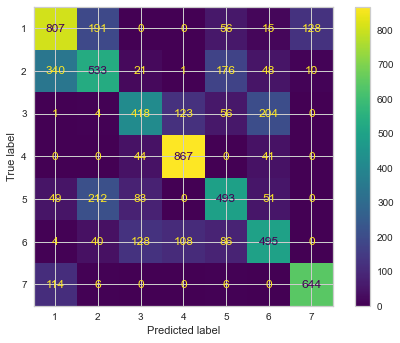

In [51]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
# plot_confusion_matrix(svm_model_grid, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(svm_model_grid, X_train, y_train);

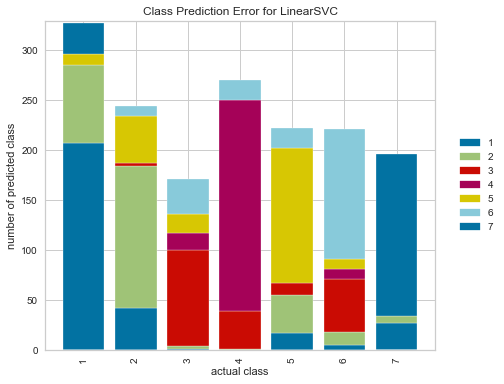

In [52]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_modelSVM)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

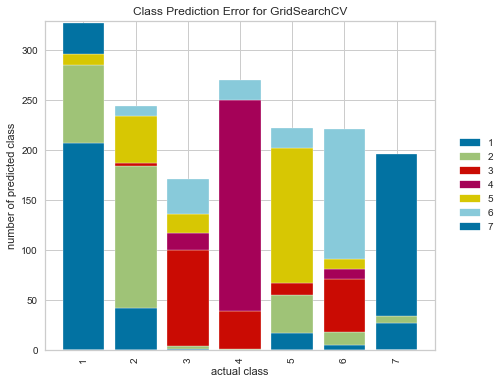

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [53]:
visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [54]:
modelTree = DecisionTreeClassifier(random_state=42)

modelTree.fit(X_train , y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
modelTree_bg = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_jobs=-1, max_samples=.2, n_estimators=10)

modelTree_bg.fit(X_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=0.2, n_jobs=-1)

In [56]:
y_pred_test = modelTree.predict(X_test)
y_pred_train = modelTree.predict(X_train)

y_pred_test_bg = modelTree_bg.predict(X_test)
y_pred_train_bg = modelTree_bg.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.67      0.64      0.66       299
           2       0.60      0.59      0.59       282
           3       0.69      0.64      0.66       202
           4       0.93      0.91      0.92       238
           5       0.84      0.81      0.82       222
           6       0.70      0.82      0.76       215
           7       0.86      0.88      0.87       193

    accuracy                           0.75      1651
   macro avg       0.76      0.76      0.75      1651
weighted avg       0.75      0.75      0.75      1651




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1197
           2       1.00      1.00      1.00      1129
           3       1.00      1.00      1.00       806
           4       1.00      1.00      1.00       952
           5       1.00      1.00      1.0

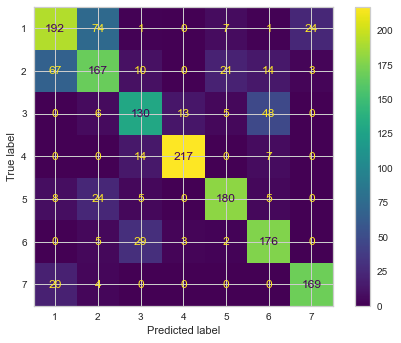

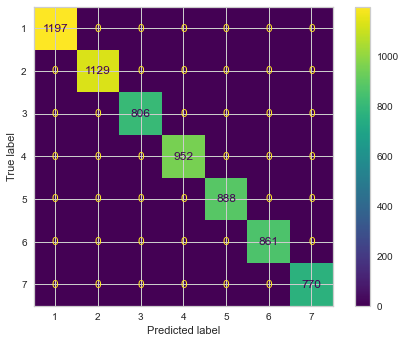

In [57]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(modelTree, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(modelTree, X_train, y_train);

TEST REPORT_BAGGING
              precision    recall  f1-score   support

           1       0.65      0.67      0.66       299
           2       0.63      0.50      0.56       282
           3       0.71      0.66      0.68       202
           4       0.89      0.94      0.91       238
           5       0.76      0.85      0.80       222
           6       0.73      0.75      0.74       215
           7       0.83      0.90      0.87       193

    accuracy                           0.74      1651
   macro avg       0.74      0.75      0.75      1651
weighted avg       0.73      0.74      0.74      1651




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT_BAGGING
              precision    recall  f1-score   support

           1       0.78      0.79      0.79      1197
           2       0.79      0.69      0.74      1129
           3       0.81      0.79      0.80       806
           4       0.93      0.98      0.96       952
           5       0.82   

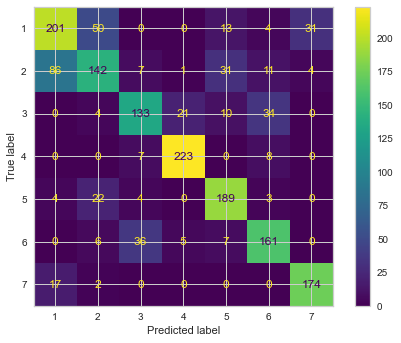

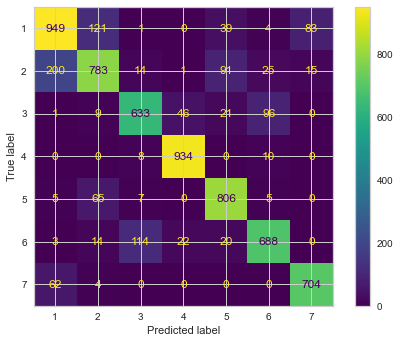

In [58]:
print("TEST REPORT_BAGGING")
print(classification_report(y_test, y_pred_test_bg))
plot_confusion_matrix(modelTree_bg, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT_BAGGING")
print(classification_report(y_train, y_pred_train_bg))
plot_confusion_matrix(modelTree_bg, X_train, y_train);

In [59]:
modelTree_bg_accuracy_test = accuracy_score(y_test, y_pred_test_bg)
modelTree_bg_accuracy_train = accuracy_score(y_train, y_pred_train_bg)

modelTree_bg_f1_test = f1_score(y_test, y_pred_test_bg, average='macro')
modelTree_bg_f1_train = f1_score(y_train, y_pred_train_bg, average='macro')

modelTree_bg_accuracy_test, modelTree_bg_accuracy_train, modelTree_bg_f1_test, modelTree_bg_f1_train

(0.74076317383404, 0.8325003786157807, 0.7463026938872906, 0.8360227026204328)

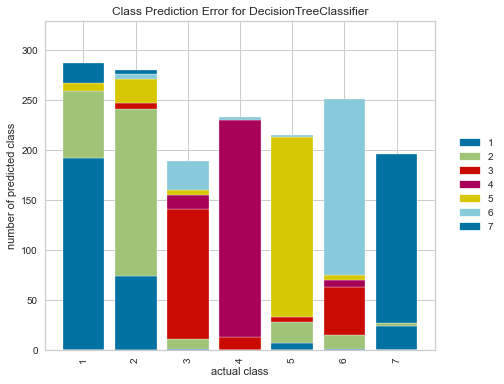

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [60]:
visualizer = ClassPredictionError(modelTree)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

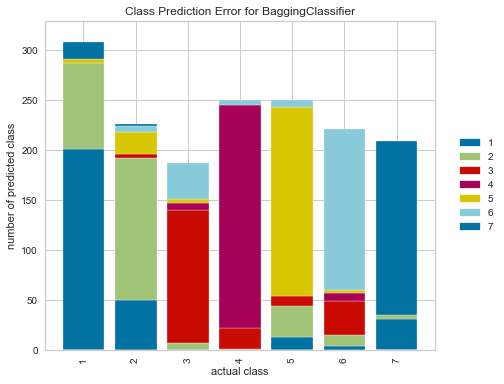

<AxesSubplot:title={'center':'Class Prediction Error for BaggingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [61]:
visualizer = ClassPredictionError(modelTree_bg)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [62]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [64]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.8304058146577832, 1.0, 0.8369286790498813, 1.0)

TEST REPORT
              precision    recall  f1-score   support

           1       0.76      0.77      0.76       299
           2       0.74      0.65      0.69       282
           3       0.82      0.76      0.79       202
           4       0.92      0.97      0.95       238
           5       0.89      0.91      0.90       222
           6       0.80      0.87      0.84       215
           7       0.92      0.95      0.93       193

    accuracy                           0.83      1651
   macro avg       0.84      0.84      0.84      1651
weighted avg       0.83      0.83      0.83      1651




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1197
           2       1.00      1.00      1.00      1129
           3       1.00      1.00      1.00       806
           4       1.00      1.00      1.00       952
           5       1.00      1.00      1.0

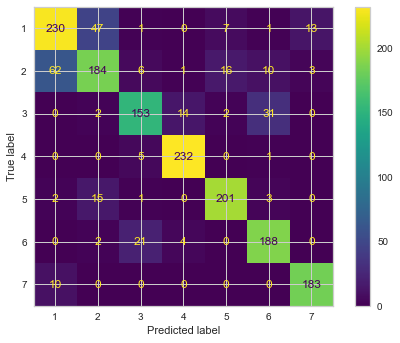

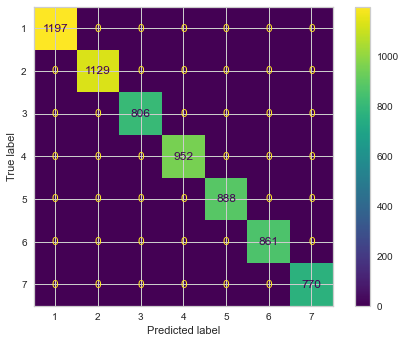

In [65]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rfc, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rfc, X_train, y_train);

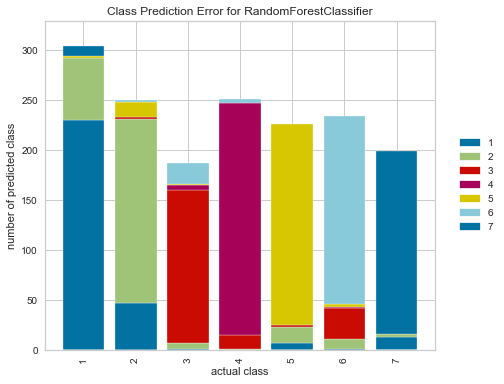

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [66]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [67]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,9],
             'max_features':['auto'],
             'max_leaf_nodes': [286],
             'min_samples_split':[10],
             'n_estimators':[250,356],
             }

In [68]:
rf_model = RandomForestClassifier(random_state=42)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             refit=True,
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 9],
                         'max_features': ['auto'], 'max_leaf_nodes': [286],
                         'min_samples_split': [10],
                         'n_estimators': [250, 356]},
             scoring='accuracy', verbose=2)

In [69]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': 286,
 'min_samples_split': 10,
 'n_estimators': 250}

In [70]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [71]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.7577225923682617,
 0.8169014084507042,
 0.7606290281736794,
 0.8210769535323017)

TEST REPORT
              precision    recall  f1-score   support

           1       0.65      0.75      0.70       299
           2       0.67      0.47      0.55       282
           3       0.82      0.61      0.70       202
           4       0.85      0.98      0.91       238
           5       0.75      0.88      0.81       222
           6       0.74      0.80      0.77       215
           7       0.90      0.87      0.88       193

    accuracy                           0.76      1651
   macro avg       0.77      0.77      0.76      1651
weighted avg       0.76      0.76      0.75      1651




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.73      0.82      0.77      1197
           2       0.79      0.60      0.68      1129
           3       0.89      0.73      0.80       806
           4       0.88      0.99      0.93       952
           5       0.79      0.91      0.8

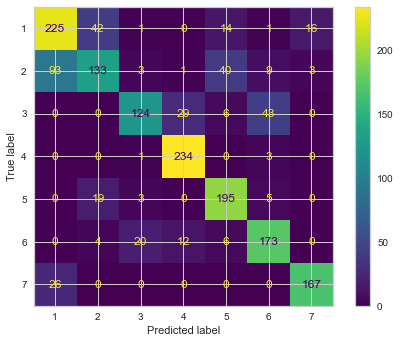

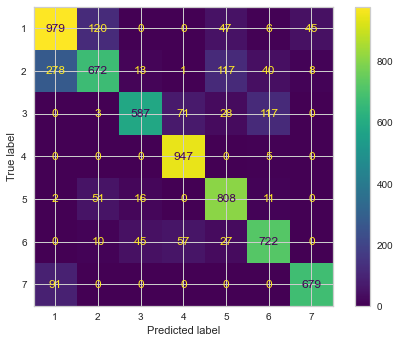

In [72]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rf_grid_model, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rf_grid_model, X_train, y_train);

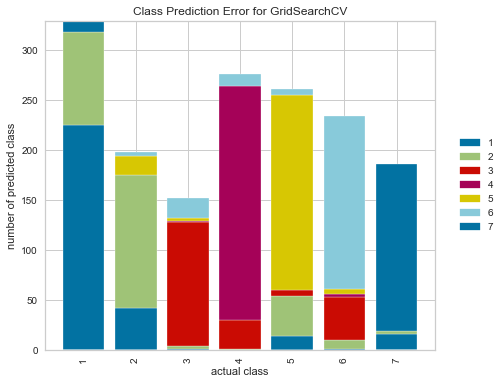

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [73]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [74]:
max_depth = list()
for tree in rfc.estimators_:
    max_depth.append(tree.tree_.max_depth)
print("avg max depth %0.1f" % (sum(max_depth) / len(max_depth)))

avg max depth 30.9


### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [75]:
y_test = y_test-1
y_train = y_train-1

In [76]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [77]:
y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

In [78]:
xgb_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_f1_test = f1_score(y_test, y_pred_test, average='macro')
xgb_f1_train = f1_score(y_train, y_pred_train, average='macro')

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.8110236220472441,
 0.9981826442526125,
 0.8172428151520267,
 0.9985247918683855)

TEST REPORT
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       299
           1       0.72      0.61      0.66       282
           2       0.79      0.74      0.76       202
           3       0.94      0.98      0.96       238
           4       0.86      0.90      0.88       222
           5       0.79      0.84      0.81       215
           6       0.88      0.95      0.91       193

    accuracy                           0.81      1651
   macro avg       0.82      0.82      0.82      1651
weighted avg       0.81      0.81      0.81      1651




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1197
           1       0.99      1.00      0.99      1129
           2       1.00      1.00      1.00       806
           3       1.00      1.00      1.00       952
           4       1.00      1.00      1.0

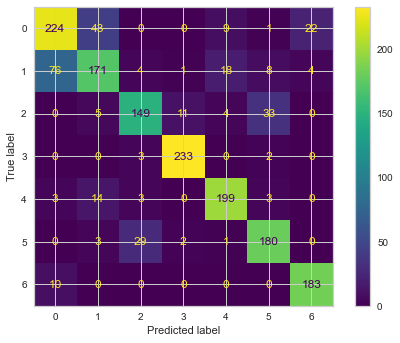

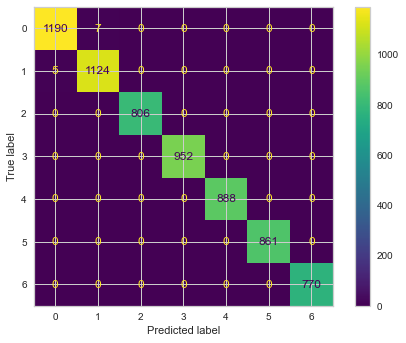

In [79]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_classifier, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(xgb_classifier, X_train, y_train);

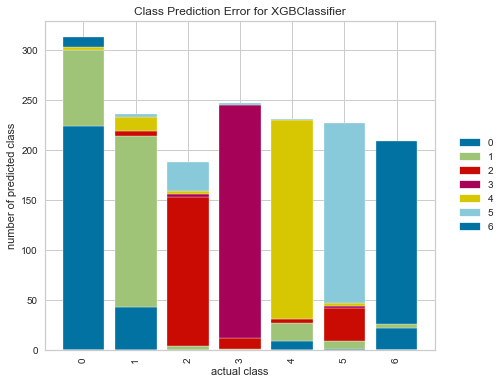

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [80]:
visualizer = ClassPredictionError(xgb_classifier)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [81]:
# GridSearch

param_grid = {'n_estimators':[100,127],
             'learning_rate': [0.05,0.06],
             'min_child_weight' : [8],
             'max_depth':[3,5],
             'subsample': [0.9],
             'min_split_loss': [0.8],
             'colsample_bytree': [0.5,0.8],
             'grow_policy': ['depthwise'],
             'eval_metric' : ["merror"],
             'reg_lambda' : [1]}

In [82]:
xgb_model =   XGBClassifier(random_state=42)
xgb_grid_model = GridSearchCV(xgb_model,
                             param_grid,
                             verbose=1,
                             scoring="accuracy",
                             refit=True,
                             n_jobs=-1)

xgb_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.8],
                         'eval_metric': ['merror'],
                         'grow_policy': ['depthwise'],
                         'learning_rate': [0.05, 0.06], 'max_depth': [3, 5],
                         'min_child_weight': [8], 'min_split_loss': [0.8],
                         'n_estimators': [100, 127], 'reg_lambda': [1],
                         'subsample': [0.9]},
             scoring='accuracy', verbose=1)

In [83]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.8,
 'eval_metric': 'merror',
 'grow_policy': 'depthwise',
 'learning_rate': 0.06,
 'max_depth': 5,
 'min_child_weight': 8,
 'min_split_loss': 0.8,
 'n_estimators': 127,
 'reg_lambda': 1,
 'subsample': 0.9}

In [84]:
y_pred_test = xgb_grid_model.predict(X_test)
y_pred_train = xgb_grid_model.predict(X_train)

In [85]:
xgb_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_f1_test = f1_score(y_test, y_pred_test, average='macro')
xgb_f1_train = f1_score(y_train, y_pred_train, average='macro')

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.761962447001817, 0.8314402544298046, 0.7631317275234498, 0.8343983283012408)

In [ ]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_grid_model, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(xgb_grid_model, X_train, y_train);

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (7).

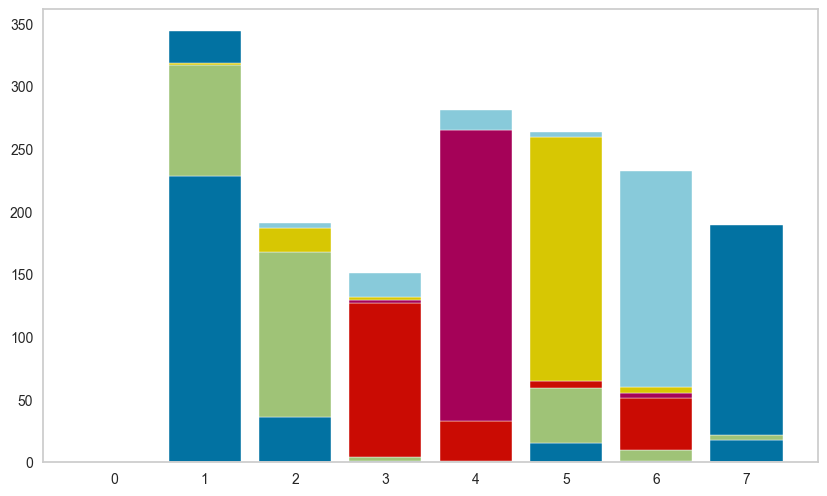

In [393]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

Text(0.5, 1.0, 'Test Accuracy Score of Different Models')

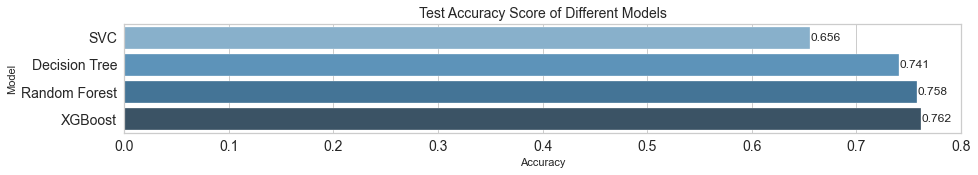

In [86]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [SVM_accuracy_test, rfc_accuracy_test, xgb_accuracy_test, modelTree_bg_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True).round(3)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0])
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14)

# F1 Score Comparison

Text(0.5, 1.0, 'Test F1 Score of Different Models')

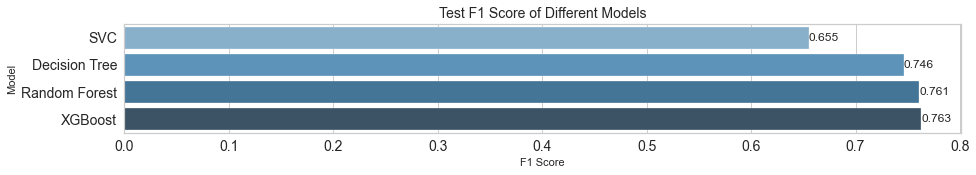

In [87]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "F1 Score": [svm_f1_test, rfc_f1_test, xgb_f1_test, modelTree_bg_f1_test]})

compare = compare.sort_values(by="F1 Score", ascending=True).round(3)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0])
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___